In [14]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [15]:
url = 'https://raw.githubusercontent.com/GusttavoLopes/machine-learning/main/emprestimo.csv'
df = pd.read_csv(url, delimiter = ',')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   valor         14 non-null     object
 1   idade         14 non-null     object
 2   salario       14 non-null     object
 3   possui_conta  14 non-null     object
 4   empresta      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


,valor,idade,salario,possui_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


In [16]:
df['empresta'],class_names = pd.factorize(df['empresta'])
print(class_names)
print(df['empresta'].unique())

Index(['Nao', 'Sim'], dtype='object')
[0 1]


In [17]:
df['valor'],_ = pd.factorize(df['valor']) 
print(df['valor'].unique())

[0 1 2]


In [18]:
df['idade'],_ = pd.factorize(df['idade'])
print(df['idade'].unique())

[0 1 2]


In [19]:
df['salario'],_ = pd.factorize(df['salario'])
print(df['salario'].unique())

[0 1]


In [20]:
df['possui_conta'],_ = pd.factorize(df['possui_conta']) # Sim=0; Nao=1
print(df['possui_conta'].unique())

[0 1]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   valor         14 non-null     int64
 1   idade         14 non-null     int64
 2   salario       14 non-null     int64
 3   possui_conta  14 non-null     int64
 4   empresta      14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [22]:
df.head()

,valor,idade,salario,possui_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1


In [23]:
df

,valor,idade,salario,possui_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [24]:
feature_cols = ['valor','idade','salario','possui_conta']
X_train = df[feature_cols]

In [25]:
y_train = df.empresta

In [26]:
X_train.columns
df.columns[4]

'empresta'

In [27]:
clf = DecisionTreeClassifier(criterion='entropy')

In [28]:
clf = clf.fit(X_train,y_train)

In [29]:
clf

DecisionTreeClassifier(criterion='entropy')

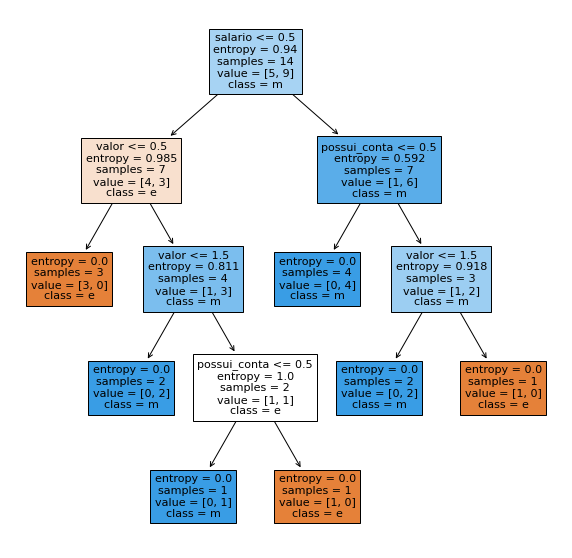

In [30]:
fig1 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig1.savefig("fig1.png")

In [31]:
feature_cols = ['valor','idade','salario','possui_conta']
X_train = df[feature_cols]

In [32]:
y_train = df.empresta

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [35]:
X_train
X_test

,valor,idade,salario,possui_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [36]:
clf = DecisionTreeClassifier(criterion='entropy')

In [37]:
clf = clf.fit(X_train,y_train)

In [38]:
clf

DecisionTreeClassifier(criterion='entropy')

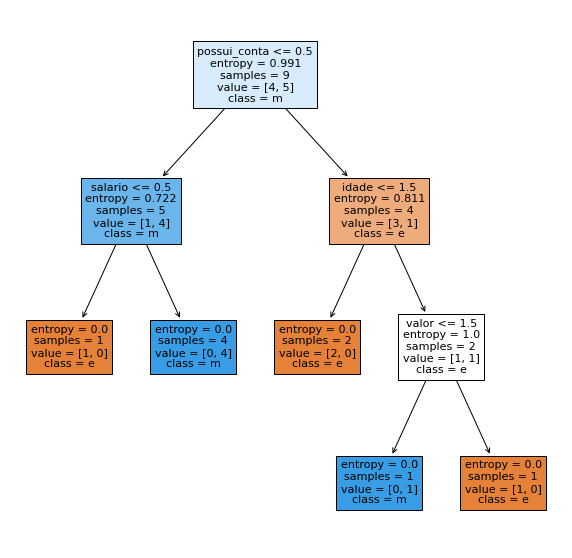

In [39]:
fig2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig2.savefig("fig2.png")